![Trump Twitter Analysis](https://assets2.bigthink.com/system/idea_thumbnails/63401/size_1024/trump_Twitter.jpg?1503165072)

# Importing, Loading, Cleaning

The following data includes all of tweets from @realDonaldTrump since the day before the 2016 Election. 

In [227]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
%matplotlib inline
plt.style.use('fivethirtyeight')

In [228]:
df = pd.read_csv('trump_tweets.csv', encoding = 'ISO-8859-1')
print(df.shape)
# Correct created_at to be a datetime object 
df.created_at = pd.to_datetime(df.created_at)
df.head()

(4150, 7)


,source,text,created_at,retweet_count,favorite_count,is_retweet,id_str
0,Twitter for iPhone,Jenna Ellis ÒFBI thought they wouldnÕt get caught because they thought that Hillary was going to win. There is overt bias and that depends on whether you are Democrat or Republican - a double standard that needs to stop.Ó,2018-08-09 22:50:00,26667.0,98925.0,False,1.027690e+18
1,Twitter for iPhone,@LindseyGrahamSC ÒWhy didnÕt the FBI tell President Trump that they had concerns about Carter Page? Is there a double standard here?Ó They told Senator Diane Feinstein that she had a spy - but not Trump. Is that entrapment or did they just want to use Page as an excuse to SPY?,2018-08-09 19:43:00,5966.0,12205.0,False,1.027640e+18
2,Twitter for iPhone,Congressman Ted Yoho of Florida is doing a fantastic job and has my complete and total Endorsement! Tough on Crime and Borders Ted was really helpful on Tax Cuts. Vote all the way for Ted in the upcoming Primary - he will never let you down!,2018-08-09 17:00:00,16838.0,69806.0,False,1.027600e+18
3,Twitter for iPhone,Space Force all the way!,2018-08-09 16:03:00,35382.0,131769.0,False,1.027590e+18
4,Twitter for iPhone,This is an illegally brought Rigged Witch Hunt run by people who are totally corrupt and/or conflicted. It was started and paid for by Crooked Hillary and the Democrats. Phony Dossier FISA disgrace and so many lying and dishonest people already fired. 17 Angry Dems? Stay tuned!,2018-08-09 16:02:00,24439.0,91267.0,False,1.027590e+18


In [229]:
# Use created_at to create relevant date, hour, and time specific columns 
df['date'] = df.created_at.dt.strftime('%d/%m/%y')
df['time'] = df.created_at.dt.strftime('%H:%M')
df['hour'] = df.created_at.dt.strftime('%H')
df = df[df.hour != 'NaT']

# Remove urls from all tweets 
df.text = df.text.str.replace(r'http\S+', '')
# This removes tweets that are also just urls - remove any rows that are just blank 
df.text = df.text[df.text != '']
# keep tweets that are not NA
df = df[df.text.notna()]

# delete irrelevant rows - no retweets exist, get rid of is_retweet and id_str
df.drop(columns=['is_retweet', 'id_str'], axis = 1, inplace=True)


# Basic Analysis

#### Descriptive stats on his tweets, favorites, retweets

In [230]:
df.text.str.len().describe()

count    4139.000000
mean     151.133366 
std      72.339522  
min      2.000000   
25%      112.000000 
50%      138.000000 
75%      202.000000 
max      310.000000 
Name: text, dtype: float64

Which tweet had just two characters? 

In [231]:
# A tweet with just two characters? 
df.text[df.text.str.len() == df.text.str.len().min()]

3206    We
Name: text, dtype: object

In [232]:
df[['retweet_count', 'favorite_count']].describe()

,retweet_count,favorite_count
count,4139.000000,4139.000000
mean,20381.474028,86272.844165
std,14248.967354,41640.761487
min,2.000000,0.000000
25%,13123.000000,60853.500000
50%,18146.000000,80461.000000
75%,24576.000000,104355.000000
max,369530.000000,633253.000000


Which tweets were most and lease favorited/retweeted? 

In [233]:
# Most retweeted
df[['text', 'retweet_count', 'date']][df.retweet_count == np.max(df.retweet_count)]

,text,retweet_count,date
2943,#FraudNewsCNN #FNN,369530.0,02/07/17


In [234]:
# Most favorited
pd.set_option('display.max_colwidth', -1)
df[['text', 'favorite_count', 'date']][df.favorite_count == np.max(df.favorite_count)]

,text,favorite_count,date
4126,Such a beautiful and important evening! The forgotten man and woman will never be forgotten again. We will all come together as never before,633253.0,09/11/16


The most retweeted tweet was when Trump posted a meme-video of him tackling CNN. This was a WWE video of Trump with the CNN logo placed on the face of Vince McMahon. 

The most favorited tweet came from Trump on 9/11/2016 in honoring those who lost their lives on the tragic day in 2001. 

In [254]:
# Least favorited 
df[['text', 'favorite_count', 'date']][df.favorite_count == np.min(df.favorite_count)]

,text,favorite_count,date
288,What good is NATO if Germany is paying Russia billions of dollars for gas and energy? Why are their only 5 out of 29 countries that have met their commitment? The U.S. is paying for EuropeÕs protection then loses billions on Trade. Must pay 2% of GDP IMMEDIATELY not by 2025.,0.0,11/07/18


In [255]:
df[['text', 'retweet_count', 'date']][df.retweet_count == np.min(df.retweet_count)]

,text,retweet_count,date
3650,I don't know Putin have no deals in Russia and the haters are going crazy - yet Obama can make a deal with Iran #1in terror no problem!,2.0,07/02/17


The least favorited and retweeted tweets had very low counts (0 and 2, respectively). This leads me to believe that they were deleted shortly after he posted it. Unfortunately, there's no simple way to check whether tweets here have been deleted just based on this dataset. There's potential within the id string column (could potentially check the Twitter API) but I won't concern myself with that here. 

Is there any pattern when it comes to the device he chooses to use? 

In [235]:
table = df[['retweet_count', 'favorite_count']].groupby(by=df.source).agg(np.median)
table.sort_values(by = 'retweet_count')

,retweet_count,favorite_count
source,,
Periscope,10123.0,31207.0
Twitter for iPad,11786.0,57181.5
Twitter Ads,11817.0,52685.5
Media Studio,15075.0,64941.0
Twitter Web Client,15213.0,67193.0
Twitter for iPhone,18317.5,81236.0
Twitter for Android,19486.5,89514.5


Ads, live videos, and live streams are less popular generally. This makes sense, as those are likely conducted by PR folks. The most popular tweets are those sent by Trump himself on his iPhone, Android, or computer. 

How frequently are each of these categories used? 

In [236]:
# Here's a pivot table instead - exact same output as a groupby
df.source.value_counts()

Twitter for iPhone     3422
Twitter for Android    440 
Media Studio           149 
Twitter Web Client     61  
Twitter Ads            34  
Twitter for iPad       32  
Periscope              1   
Name: source, dtype: int64

#### Capitalized Tweets

In [237]:
df.text[df.text.str.isupper()].unique()

array(['RED WAVE!', 'HAPPY BIRTHDAY @USCG! ',
       'MAKING AMERICA GREAT AGAIN! ', 'PROMISES KEPT! ',
       'MAKE AMERICA GREAT AGAIN!', 'JOBS JOBS JOBS! ',
       'AMERICA IS OPEN FOR BUSINESS! ', 'ALL-TIME RECORD OPTIMISM! ',
       'THANK YOU @NFIB! #NFIB75 ', 'CHANGE THE LAWS!', 'FAIR TRADE!',
       'WELCOME HOME JOSH! ', 'WITCH HUNT!', 'MAGA! ',
       'A TOTAL WITCH HUNT!!!', 'WE WILL PROTECT OUR SOUTHERN BORDER! ',
       'HAPPY EASTER!',
       'THE HOUSE INTELLIGENCE COMMITTEE HAS AFTER A 14 MONTH LONG IN-DEPTH INVESTIGATION FOUND NO EVIDENCE OF COLLUSION OR COORDINATION BETWEEN THE TRUMP CAMPAIGN AND RUSSIA TO INFLUENCE THE 2016 PRESIDENTIAL ELECTION.',
       'JOBS JOBS JOBS! #MAGA ', 'REST IN PEACE BILLY GRAHAM! ',
       'NEW FBI TEXTS ARE BOMBSHELLS!', '#AMERICA FIRST!',
       'AMERICA FIRST!', 'MERRY CHRISTMAS!!! ', 'MERRY CHRISTMAS!! ',
       'WE ARE MAKING AMERICA GREAT AGAIN! ',
       'DOW RISES 5000 POINTS ON THE YEAR FOR THE FIRST TIME EVER - MAKE AMERICA GRE

In [238]:
# Many of these are just MAGA related
# Let's see how many
df.text.str.extractall(r'(MAKE AMERICA GREAT AGAIN)|(MAGA)').index.size

142

#### Hashtags

In [276]:
hashtags = df.text.str.extractall(r"#(\w+)")
# These are only hashtags that have value_counts greater than 4
mask = hashtags.loc[:, 0].value_counts() > 4
hashtags.loc[:,0].value_counts()[mask]

MAGA                57
USA__               22
FakeNews            17
MAGA__              14
ICYMI               11
TaxReform           10
ThankYouTour2016    9 
1                   8 
HurricaneHarvey     8 
UNGA                8 
AmericaFirst__      8 
APEC2017            7 
WEF18               6 
AmericaFirst        6 
LESM                5 
WeeklyAddress__     5 
NoKo                5 
KatesLaw            5 
USA                 5 
Name: 0, dtype: int64

# Time Investigation
### Frequency

1. How frequently does Trump tweet? 
2. What was the longest gap in between tweets? 

In [239]:
# Need to count time between tweets 
# Create timedelta column
# NEED TO REINDEX BEFORE I CAN RUN THIS LOOP
df.index = range(len(df))

timedifference = []
for i in range(len(df) - 1): # range is df - 1 because the last tweet can't add 1
    timedifference.append(df.created_at[i] - df.created_at[i+1])

In [251]:
print('Mean:',np.mean(timedifference))
print('Median:',np.median(timedifference))
print('Max:',np.max(timedifference))

Mean: 0 days 03:42:47.907201
Median: 0 days 01:00:00
Max: 8 days 23:24:00


The average time between tweets is about 3 hours and 43 minutes. Keep in mind that this is a left-skewed distribution as Trump will often tweet multiple times in a row 

The longest Trump has gone without tweeting was 8 days and 23 hours. When was this? 

In [248]:
index = np.where(np.isin(timedifference, max(timedifference)))[0]
df[['text', 'created_at']].iloc[[1605, 1606]]

,text,created_at
1605,Today it was my great honor to sign a new Executive Order to ensure Veterans have the resources they need as they transition back to civilian life. We must ensure that our HEROES are given the care and support they so richly deserve!,2018-01-09 23:07:00
1606,HAPPY NEW YEAR! We are MAKING AMERICA GREAT AGAIN and much faster than anyone thought possible!,2017-12-31 23:43:00


It was during New Years 2017. 

### Overall Tweet-Time Pattern

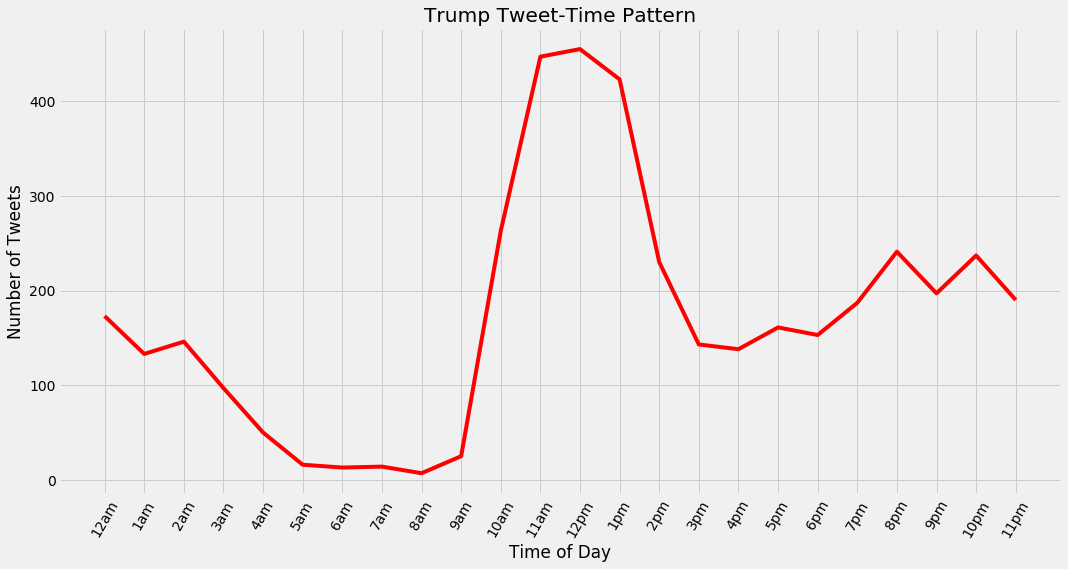

In [78]:
plt.style.use('fivethirtyeight')
l1 = list(range(0, 24))
times = ['12am']
for i in range(1,12):
    i = str(i)
    times.append(i+'am')
times.append('12pm')
for i in range(1, 12):
    i = str(i)
    times.append(i+'pm')
plt.plot(np.sort(df.hour.unique()), df.hour.value_counts()[np.sort(df.hour.value_counts().index)], 
        color = 'red')
plt.xticks(l1, times, rotation = 60)
plt.xlabel('Time of Day')
plt.ylabel('Number of Tweets')
plt.title('Trump Tweet-Time Pattern')
plt.rcParams['figure.figsize'] = [16, 8]
plt.show()

## News Sources

In [79]:
# Index of mentions of fox and friends (he always tweets @foxandfriends)
foxandfriends = df.text.str.extractall(r'(foxandfriends)|(fox and friends)|(fox & friends)|(fox&friends)', 
                                       re.IGNORECASE).index.get_level_values(0)
fandf = df.iloc[foxandfriends, np.where(df.columns.isin(['hour']))[0]]

fakenews = df.text.str.extractall(r'(cnn)|(new york times)|(nyt)|(nytimes)', re.IGNORECASE).index.get_level_values(0)
fakenews = df[['text', 'hour']].iloc[fakenews]

## CNN

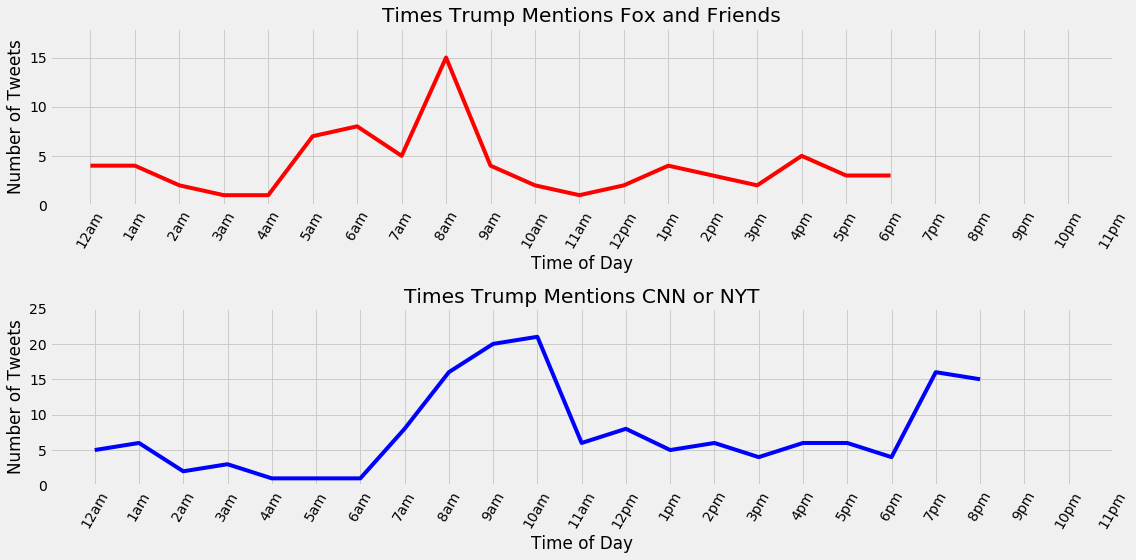

In [81]:
plt.subplot(2,1,1)
plt.plot(np.sort(fandf.hour.unique()), fandf.hour.value_counts()[np.sort(fandf.hour.value_counts().index)], 
        color = 'red')
plt.xticks(l1, times, rotation = 60)
plt.xlabel('Time of Day')
plt.ylabel('Number of Tweets')
plt.ylim((0, 18))
plt.title('Times Trump Mentions Fox and Friends')

# fakenews is in jest, to be clear 
plt.subplot(2,1,2)
plt.plot(fakenews.hour.value_counts()[np.sort(fakenews.hour.value_counts().index)], color = 'blue')
plt.xticks(l1, times, rotation = 60)
plt.xlabel('Time of Day')
plt.ylabel('Number of Tweets')
plt.title('Times Trump Mentions CNN or NYT')
plt.ylim((0, 25))
plt.tight_layout()

# Word-Searches
### Common Phrases

In [151]:
df.text.str.extractall(r'(usa)', re.IGNORECASE).size

110

In [142]:
phrases = ['hoax', 'witch hunt', 'collusion', 'fake news', 'election', 'maga', 'wall']

# Want to discover which came first 
time_first_mentioned = []
for phrase in phrases: 
    # for each phrase, find all indices of tweets where phrase occurs
    ind = df.text.str.extractall(r'({})'.format(phrase), re.IGNORECASE).index.get_level_values(0)
    # append the first time used to time_first_mentioned 
    time_first_mentioned.append(np.min(df.created_at[ind]))
# Create a dictionary of phrase and time_first_mentioned 
order = dict(zip(phrases, time_first_mentioned))
# sort this dictionary 
order = dict(sorted(order.items(), key = lambda x: x[1]))

In [143]:
# empty dictionary to append number of tweets to 
wordsearch_dict = {}
for word in order.keys():
    wordsearch_dict.update({word: df.text.str.extractall(r'({})'.format(word), re.IGNORECASE).size})

## Nations

In [153]:
nations = ['russia', 'iran', 'france', 'germany', 'canada', 'israel', 'korea'] 
# Create a dictionary to capture number of mentions in tweets since Comey firing 
nations_dict = {}
for nation in nations:
    # for each nation, add a dict of nation: number of times mentioned (based on a regex search)
    nations_dict.update({nation: df.text.str.extractall(r'({})'.format(nation), re.IGNORECASE).size})
# Will do United States and United Kingdom manually - UK and USA can also count 
nations_dict.update({'united states': df.text.str.extractall(r'(united states)|(usa)', re.IGNORECASE).size})
nations_dict.update({'united kindgom': df.text.str.extractall(r'(united kingdom)|(uk)', re.IGNORECASE).size})
# sort the dictionary by the number of times mentioned 
nations_dict = dict(sorted(nations_dict.items(), key= lambda x: x[1], reverse=True))

## People

In [145]:
people = ['hillary', 'trump', 'obama', 'mueller', 'comey', 'kim', 'putin', 'merkel', 'trudeau', 'sessions']
people_dict = {}
for person in people:
    # for each person, add a dict of person: number of times mentioned (based on a regex search)
    people_dict.update({person: df.text.str.extractall(r'({})'.format(person), re.IGNORECASE).size})
# sort the dictionary by the number of times mentioned 
people_dict = dict(sorted(people_dict.items(), key= lambda x: x[1], reverse=True))

## Entities

In [146]:
news = ['cnn', 'fox', 'new york times', 'washington post']
news_dict = {}
for entity in news:
    # for each person, add a dict of person: number of times mentioned (based on a regex search)
    news_dict.update({entity: df.text.str.extractall(r'({})'.format(entity), re.IGNORECASE).size})
# sort the dictionary by the number of times mentioned 
news_dict = dict(sorted(news_dict.items(), key= lambda x: x[1], reverse=True))

## Plots of Word Searches

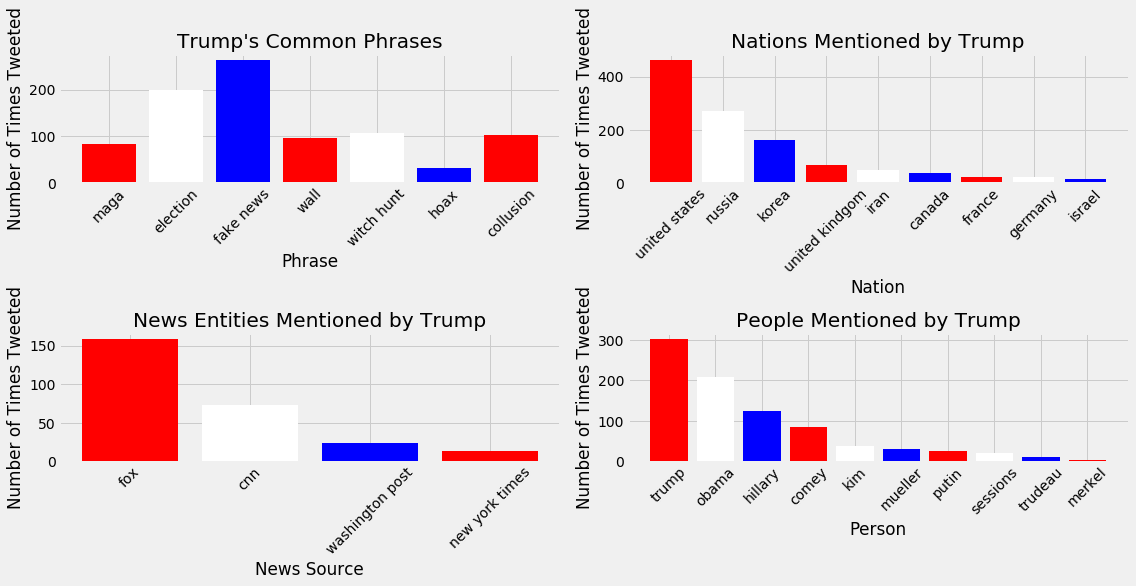

In [154]:
plt.subplot(2,2,1)
plt.bar(wordsearch_dict.keys(), wordsearch_dict.values(), color = ['red', 'white', 'blue'])
plt.xlabel('Phrase')
plt.xticks(rotation = 45)
plt.ylabel('Number of Times Tweeted')
plt.title('Trump\'s Common Phrases')

# plot it 
plt.subplot(2,2,2)
plt.bar(nations_dict.keys(), nations_dict.values(), color = ['red', 'white', 'blue'])
plt.xlabel('Nation')
plt.xticks(rotation = 45)
plt.ylabel('Number of Times Tweeted')
plt.title('Nations Mentioned by Trump')

plt.subplot(2,2,3)
plt.bar(news_dict.keys(), news_dict.values(), color = ['red', 'white', 'blue'])
plt.xlabel('News Source')
plt.xticks(rotation = 45)
plt.ylabel('Number of Times Tweeted')
plt.title('News Entities Mentioned by Trump')

plt.subplot(2,2,4)
plt.bar(people_dict.keys(), people_dict.values(), color = ['red', 'white', 'blue'])
plt.xlabel('Person')
plt.xticks(rotation=45)
plt.ylabel('Number of Times Tweeted')
plt.title('People Mentioned by Trump')
plt.tight_layout()
plt.show()